# PHY4268 Tutorial 7 - Survey of Qiskit Quantum states operations  

1. **S. G. Nana Engo**, serge.nana-engo@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I
2. **J-P. Tchapet Njafa**, jean-pierre.tchapet-njafa@univ-maroua.cm
    * Department of Physics, Faculty of Science, University of Maroua
       
May 2024

Dans ce tutoriel, nous donnons un bref aperçu des différentes opérations sur les états disponibles dans Qiskit.

In [1]:
import qiskit
qiskit.__version__ 

'1.1.0'

## États de Bell

Nous allons voir comment créer dans `Qiskit`, à partir de l'état $\ket{00}$, l'état de Bell 
\begin{equation}
|B_{00}\rangle=\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle).
\end{equation}


### Initialiser et visualiser un état un état |00>

Nous allons commencer par visualiser l'état $|00\rangle$.

In [2]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, plot_bloch_multivector


In [3]:
sv00 = Statevector.from_label('00')
sv00.draw('latex')

<IPython.core.display.Latex object>

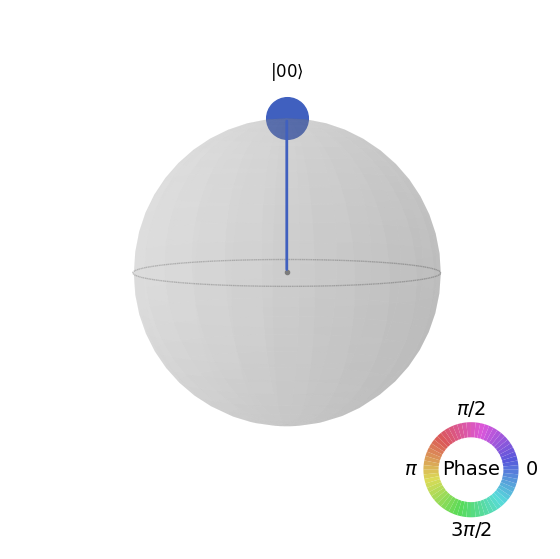

In [4]:
sv00.draw('qsphere')

La couleur représentant le vecteur $|00\rangle $ indique que sa phase est $e^{i0}=1$.

In [5]:
sv00.draw('text')

[1.+0.j,0.+0.j,0.+0.j,0.+0.j]

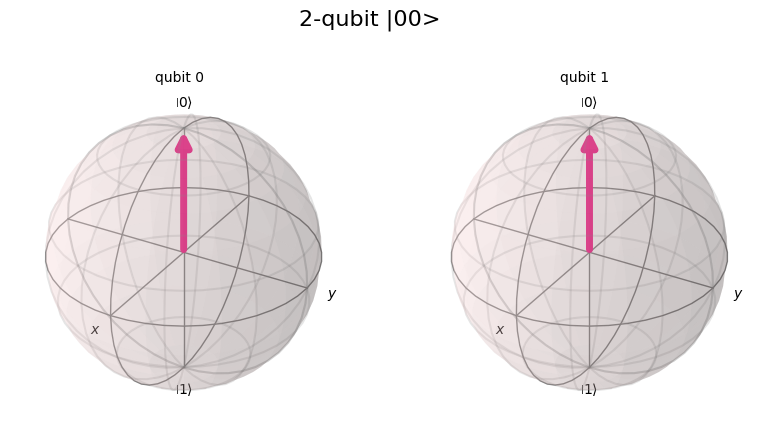

In [6]:
plot_bloch_multivector(sv00, title='2-qubit |00>')

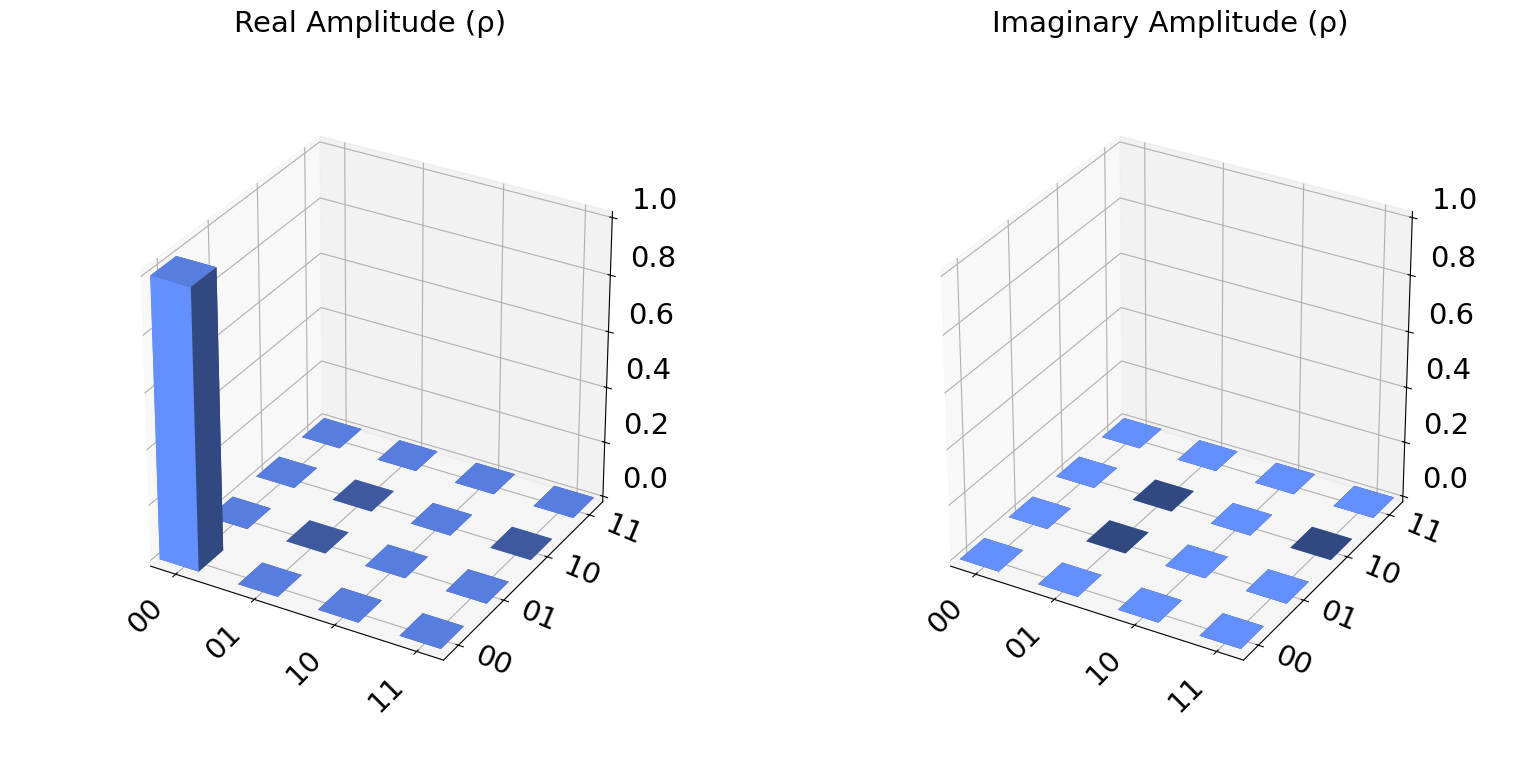

In [26]:
sv00.draw('city')

### Construire un circuit d'état de Bell

On utilise une porte Hadamard $\mathtt{H}$ et une porte $\mathtt{CX}$,
\begin{align}
&\mathtt{CX}|yx\rangle =\mathtt{X}^x|y\rangle\otimes|x\rangle,
&&\mathtt{CX}|y0\rangle =\mathtt{X}^0|y\rangle\otimes|x\rangle=|y0\rangle,
&\mathtt{CX}|y1\rangle =\mathtt{X}^1|y\rangle\otimes|x\rangle=|(1-y)1\rangle.
\end{align}
pour créer l'état de Bell
\begin{equation}
|B_{00}\rangle =\mathtt{CX}(\mathbb{I}\otimes\mathtt{H})|00\rangle 
=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle.
\end{equation}

* Deux opérateurs $\mathtt{A}$ et $\mathtt{B}$ peuvent être combinés en un opérateur de produit tensoriel $\mathtt{A}\otimes \mathtt{B}$ en utilisant les fonctions `Operator.tensor` et `Operator.expand`.

<div class="alert alert-info">
Comme dans Qiskit, le qubit (opérateur) le moins significatif est à l'extrême droite et le plus à l'extrême gauche, c'est-à-dire:

\begin{align*}
& |j_{n-1}...j_1j_0\rangle&&\text{ pour un système de $n$-qubits},\\
&Q_{n-1}\otimes\cdots\otimes Q_1\otimes Q_0&&\text{ pour un produit tensoriel} ,
\end{align*}

il faut faire attention aux représentations mathématiques des opérateurs qui ne sont pas exactement les mêmes que celles des notes de cours.
</div>

In [7]:
%%html
<div class="alert alert-info">
Comme dans Qiskit, le qubit (opérateur) le moins significatif est à l'extrême droite et le plus à l'extrême gauche, c'est-à-dire:

\begin{align*}
& |j_{n-1}...j_1j_0\rangle&&\text{ pour un système de $n$-qubits},\\
&Q_{n-1}\otimes\cdots\otimes Q_1\otimes Q_0&&\text{ pour un produit tensoriel} ,
\end{align*}

il faut faire attention aux représentations mathématiques des opérateurs qui ne sont pas exactement les mêmes que celles des notes de cours.
</div>

Par conséquent, si $\mathtt{A}$ et $\mathtt{B}$ sont des opérateurs à un seul qubit, alors

1. $\mathtt{A}$.tensor ($\mathtt{B}$) = $\mathtt{A}\otimes \mathtt{B}$ aura les sous-systèmes indexés comme matrice $\mathtt{B}$ sur le sous-système 0 et matrice $\mathtt{A}$ sur le sous-système 1;

2. $\mathtt{A}$.expand ($\mathtt{B}$) = $\mathtt{B}\otimes \mathtt{A}$ aura les sous-systèmes indexés en tant que matrice $\mathtt{A}$ sur le sous-système 0 et matrice $\mathtt{B}$ sur le sous-système 1.

### Methode 1 - Statevector

#### Construction de l'opérateur d'évolution

In [8]:
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.circuit.library import XGate, CXGate, HGate
import numpy as np

In [9]:
X = Operator(Pauli('X'))
Z = Operator(Pauli('Z')) 
I = Operator(Pauli('I'))

In [10]:
array_to_latex(I, prefix='I=')

<IPython.core.display.Latex object>

In [11]:
array_to_latex(X, prefix='X=')

<IPython.core.display.Latex object>

In [12]:
array_to_latex(Z, prefix='Z=')

<IPython.core.display.Latex object>

In [13]:
H = (X + Z)/np.sqrt(2)
array_to_latex(H, prefix='H=')

<IPython.core.display.Latex object>

In [14]:
H = Operator(HGate())
array_to_latex(H, prefix='H=')

<IPython.core.display.Latex object>

In [15]:
array_to_latex(H.tensor(I), prefix='\mathtt{H}\otimes\mathbb{I}=')

<IPython.core.display.Latex object>

In [16]:
# Ecriture simplifiée
array_to_latex(H^I, prefix='\mathtt{H}\otimes\mathbb{I}=')

<IPython.core.display.Latex object>

In [17]:
array_to_latex(H.expand(I), prefix='\mathbb{I}\otimes\mathtt{H}=')

<IPython.core.display.Latex object>

In [18]:
array_to_latex(I^H, prefix='\mathbb{I}\otimes\mathtt{H}=')

<IPython.core.display.Latex object>

In [19]:
CX = Operator(CXGate())
array_to_latex(CX, prefix='\mathtt{CX}=')

<IPython.core.display.Latex object>

<div class="alert alert-info">
Cette matrice est cohérente avec le fait que dans Qiskit, 

$$|01\rangle\equiv\underset{\text{qubit 1}}{|0\rangle}\ \underset{\text{qubit 0}}{|1\rangle},$$

qui est à l'opposé de ce que nous utilisons dans les notes de cours, 
 $$|01\rangle\equiv\underset{\text{qubit 0}}{|0\rangle}\ \underset{\text{qubit 1}}{|1\rangle}.$$
</div>

In [20]:
%%html
<div class="alert alert-info">
Cette matrice est cohérente avec le fait que dans Qiskit, 

$$|01\rangle\equiv\underset{\text{qubit 1}}{|0\rangle}\ \underset{\text{qubit 0}}{|1\rangle},$$

qui est à l'opposé de ce que nous utilisons dans les notes de cours, 
 $$|01\rangle\equiv\underset{\text{qubit 0}}{|0\rangle}\ \underset{\text{qubit 1}}{|1\rangle}.$$
</div>

In [21]:
BellOp = (I^H)&CX # Note that B & A = A * B
array_to_latex(BellOp, prefix='\mathtt{CX}(\mathbb{I}\otimes\mathtt{H}) = ')

<IPython.core.display.Latex object>

#### Evolution de |00>

In [22]:
(sv00.evolve((I^H)&CX)).draw("latex")

<IPython.core.display.Latex object>

In [23]:
Bell00 = sv00.evolve(BellOp)
Bell00.draw('latex', prefix='|\\text{B}_{00}\\rangle=')

<IPython.core.display.Latex object>

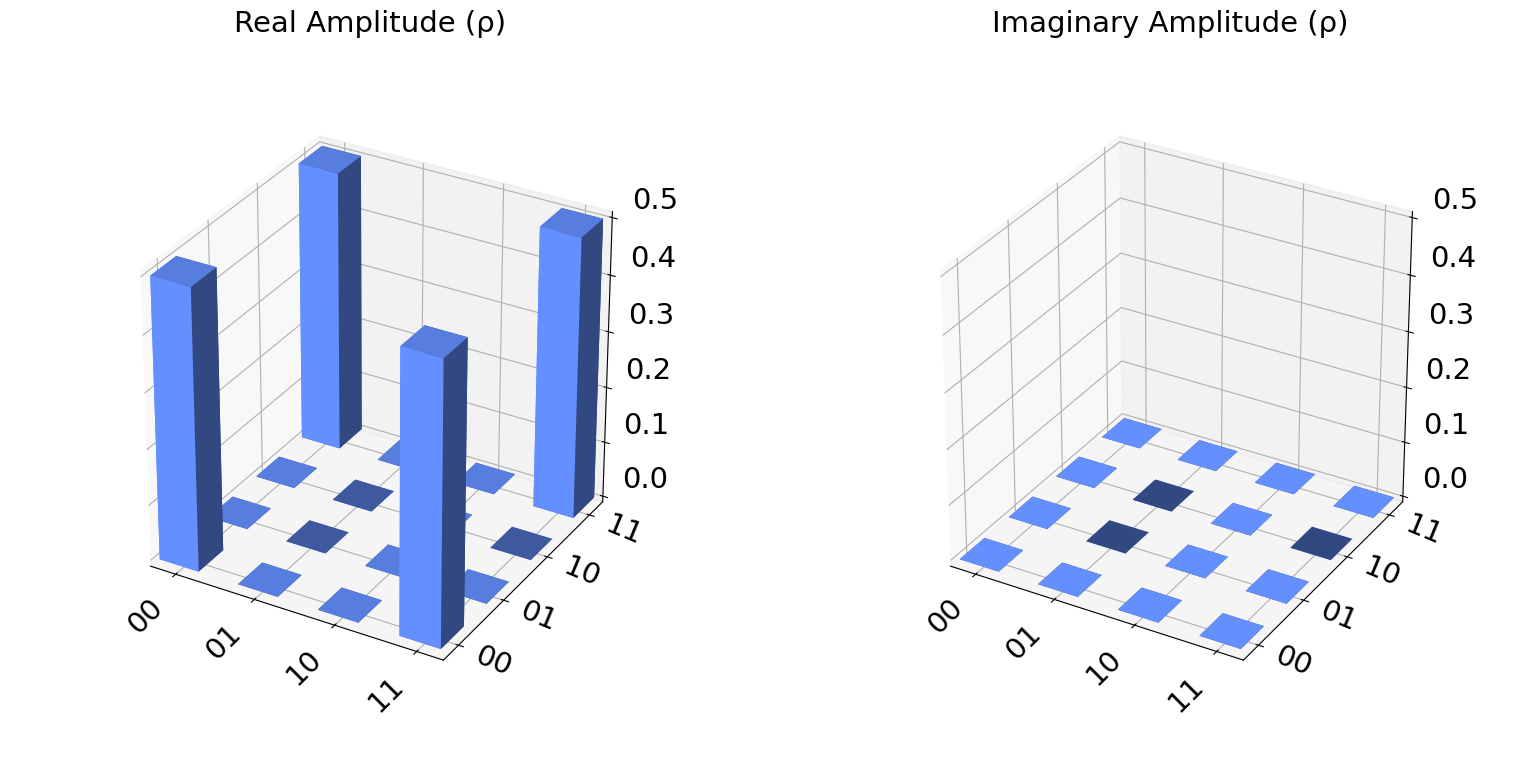

In [24]:
Bell00.draw('city')

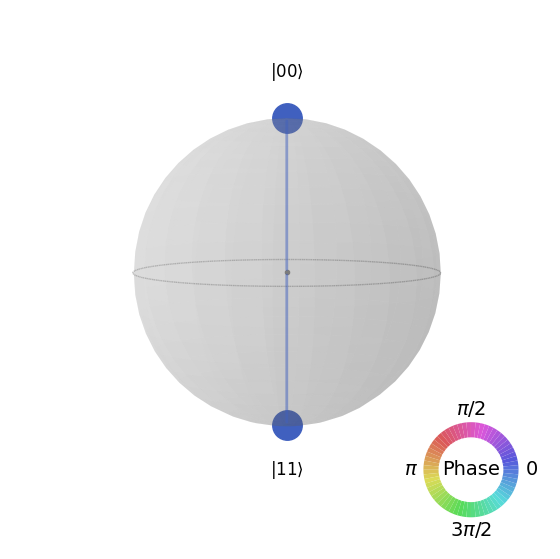

In [27]:
Bell00.draw('qsphere')

Notez comment cela ressemble beaucoup à une superposition d'un seul qubit avec une phase nulle. Suite à cet __intrication__, il n'est plus possible de traiter les deux qubits individuellement, et ils doivent être considérés comme un seul système.

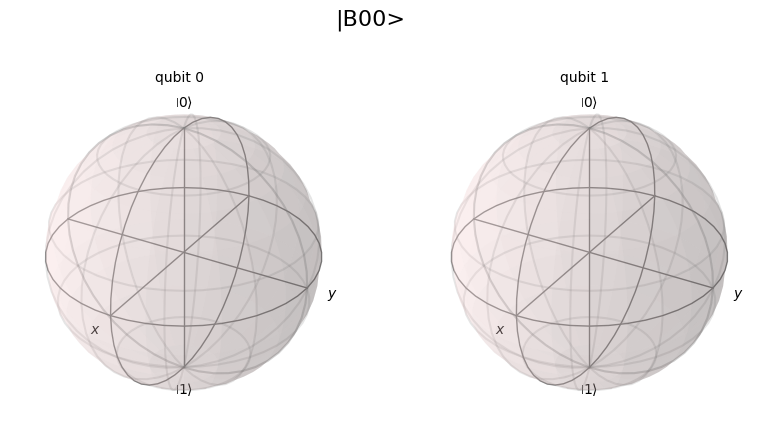

In [29]:
plot_bloch_multivector(Bell00, title='|B00>')

#### Probabilités

In [30]:
Bell00.probabilities_dict()

{'00': 0.4999999999999999, '11': 0.4999999999999999}

In [31]:
array_to_latex(Bell00.probabilities())

<IPython.core.display.Latex object>

In [32]:
from qiskit.visualization import plot_histogram

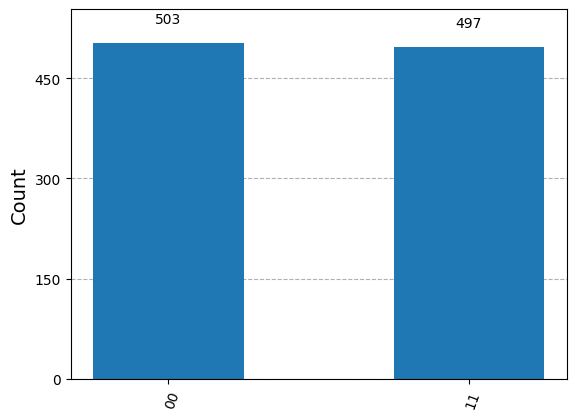

In [33]:
Bell00_counts = Bell00.sample_counts(shots=1000)

plot_histogram(Bell00_counts)

Comme nous pouvons le voir ci-dessus, toutes les mesures donnent le résultat `00` ou `11`. En d'autres termes, si le résultat de la mesure pour l'un des qubits est connu, le résultat pour l'autre est entièrement déterminé.

- Probabilités pour mesurer uniquement le qubit-0

In [34]:
array_to_latex(Bell00.probabilities([0]))

<IPython.core.display.Latex object>

In [35]:
result, new_sv = Bell00.measure([0])  # measure qubit-0
print(f"Measured: {result}\nState after measurement:")
new_sv.draw("latex")

Measured: 0
State after measurement:


<IPython.core.display.Latex object>

- Probabilités pour mesurer uniquement le qubit-1

In [36]:
array_to_latex(Bell00.probabilities([1]))

<IPython.core.display.Latex object>

### Exercices

En utilisant une procédure similaire, créer respectivement les états
\begin{align*}
&\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle), &\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle).
\end{align*}

#### Methode 2  -  QuantumCircuit


In [37]:
from qiskit import QuantumCircuit 

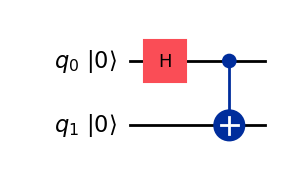

In [38]:
circuitQ = QuantumCircuit(2)

# Add a H gate on qubit 0, putting this qubit in superposition.
circuitQ.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circuitQ.cx(0, 1)

# Draw the circuit with 'mpl'
circuitQ.draw('mpl',initial_state=True) 

In [39]:
array_to_latex(Operator(circuitQ),prefix='\mathtt{CX}(\mathtt{I}\otimes\mathbb{H})=')

<IPython.core.display.Latex object>

* Le résultat de ce circuit quantique sur l'état $\ket{00}$ est trouvé en écrivant

In [40]:
Bell00 = sv00.evolve(circuitQ)
Bell00.draw('latex', prefix='|B_{00}\\rangle=')

<IPython.core.display.Latex object>

In [41]:
Bell11 = Statevector.from_label('11').evolve(circuitQ)
Bell11.draw('latex', prefix='|B_{11}\\rangle=')

<IPython.core.display.Latex object>

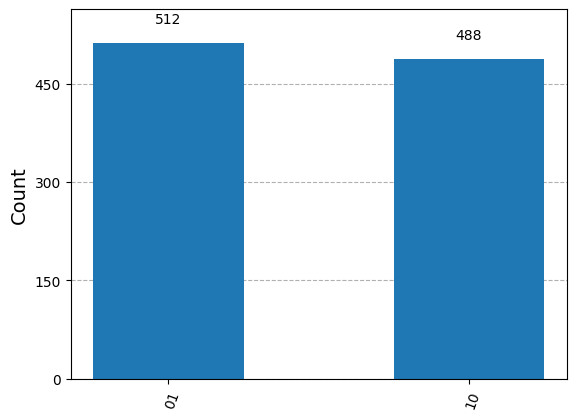

In [42]:
Bell11_counts = Bell11.sample_counts(shots=1000)

plot_histogram(Bell11_counts)

* __Exercice__: Écrivez script Qiskit pour exprimer les quatre états de Bell:
\begin{equation}
|B_{yx}\rangle=\frac{1}{\sqrt{2}}(|y0\rangle + (-1)^x|(1-y)1\rangle).
\end{equation}



In [43]:
def state(X):
    sv = Statevector.from_label(X) # X est une chaine de 2 caractères (bits)
    mycircuit = QuantumCircuit(2)
    mycircuit.h(0)
    mycircuit.cx(0,1)
    
    new_sv = sv.evolve(mycircuit)
    return display(new_sv.draw("latex"))

for x in ['00','01','10','11']:
    print(f'B{x} = \n')
    state(x)    

B00 = 



<IPython.core.display.Latex object>

B01 = 



<IPython.core.display.Latex object>

B10 = 



<IPython.core.display.Latex object>

B11 = 



<IPython.core.display.Latex object>

<div class="alert alert-info">
Ces résultats sont cohérents avec le fait que dans Qiskit, 
    
$$|01\rangle\equiv\underset{\text{qubit 1}}{|0\rangle}\ \underset{\text{qubit 0}}{|1\rangle},$$

qui est à l'opposé de ce que nous utilisons dans les notes de cours,

$$|01\rangle\equiv\underset{\text{qubit 0}}{|0\rangle}\ \underset{\text{qubit 1}}{|1\rangle}.$$

</div>

In [44]:
%%html
<div class="alert alert-info">
Ces résultats sont cohérents avec le fait que dans Qiskit, 
    
$$|01\rangle\equiv\underset{\text{qubit 1}}{|0\rangle}\ \underset{\text{qubit 0}}{|1\rangle},$$

qui est à l'opposé de ce que nous utilisons dans les notes de cours,

$$|01\rangle\equiv\underset{\text{qubit 0}}{|0\rangle}\ \underset{\text{qubit 1}}{|1\rangle}.$$

</div>

## Quick Exercises

1.	Write down the tensor product of the qubits:    
    a)	$|0\rangle|1\rangle$    
    b)	$|0\rangle|+\rangle$    
    c)	$|+\rangle|1\rangle$    
    d)	$|-\rangle|+\rangle$    

2.	Write the state $|\psi\rangle = \tfrac{1}{\sqrt{2}}|00\rangle + \tfrac{i}{\sqrt{2}}|01\rangle $ as two separate qubits.


# Mesures

Jusqu'à présent, nous avons simulé l'action d'une mesure en comptant les échantillons à partir du `statevector`. Une mesure peut également être explicitement insérée dans un circuit quantique (`QuantumCircuit`). Voici un exemple qui crée le même état de Bell et applique une mesure.


## Construction et visualisation du circuit

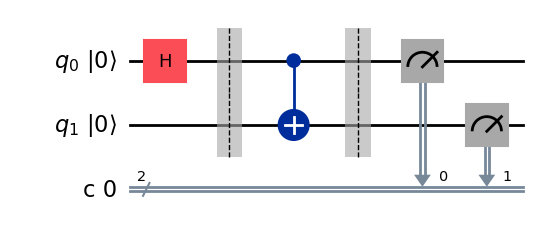

In [45]:
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)
circuit.barrier()

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)
circuit.barrier()

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])
circuit.draw('mpl',initial_state=True)


Les portes sont ajoutées une par une pour former l'état de Bell souhaité.

- `QuantumCircuit.h (qubit _index)`: appliquer la porte de Hadamar $\mathtt{H}$ sur le qubit indexé par `qubit_ index` (ici l'indice est $0$ pour le premier qubit) et le mettre en superposition;
- `QuantumCircuit.cx (int _control, int_ target)`: applique la porte $\mathtt{CNOT}$. `int _control` est l'indice du qubit de contrôle (ici c'est le premier qubit indexé par $0$) tandis que` int_ target` est l'indice du qubit cible (ici le deuxième qubit indexé par $1$). Ici, cette porte met nos qubits dans un état *intriqué*;
- `QuantumCircuit.measure ([Measur _1st_ qb, Measur _2nd_ qb, ...], [cb _Store_ 1st _qb_ résultat , cb _Store_ 2nd _qb_ result, ...]) `: permet de mesurer un qubit et de stocker le résultat dans un bit classique dédié.

Ici, si vous passez la totalité des registres quantique et classique à `measure`, le résultat de la mesure du *i* ème qubit sera stocké dans le *i* ème bit classique.

## Simuler l'expérience

Pour simuler notre circuit en mode expérience, nous allons utilisez le simulateur `BasicSimulator`, qui est un module de simulateurs quantiques basés sur Python. Chaque exécution de ce circuit donnera la chaîne de bits 00 ou 11.

In [46]:
#from qiskit_aer import AerSimulator
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import transpile

# Select the BasicSimulator from the basic provider
q_sim = BasicSimulator() #AerSimulator()

#Compile the circuit (by adding the transpiler) to reduce the circuit to QASM instructions
# supported by the backend
compiled_circuit = transpile(circuit, q_sim)

# Run the simulator on 1000 shots
job = q_sim.run(compiled_circuit, shots=1000)

# Collect results and count
result = job.result()
B00counts = result.get_counts(compiled_circuit)

# Print 
print("\nTotal count for 00 and 11 are:",B00counts)


Total count for 00 and 11 are: {'11': 521, '00': 479}


Comme prévu, la chaîne de bits de sortie est '00' environ $50\%$ du temps. Le nombre d'exécutions du circuit peut être spécifié via l'argument `shots` dont la valeur par défaut est 1024.

Une fois que vous avez un objet `result`, vous pouvez accéder aux décomptes via `get_counts(circuit)`. Cela vous donne les résultats globaux de l'expérience que vous avez menée.

<div class="alert alert-info">
Il est important de savoir que lors de l'exécution d'un circuit sur un véritable ordinateur quantique, les cicruits doivent généralement être transpilés pour le backend que vous sélectionnez afin que le circuit ne contienne que les portes que le claculateur quantique peut réellement exécuter. Cela implique principalement l'ajout de portes d'échange afin que les portes 2-qubits du circuit correspondent aux paires de qubits sur l'appareil qui peuvent réellement exécuter ces portes.
 </div>

## Visualisez les résultats

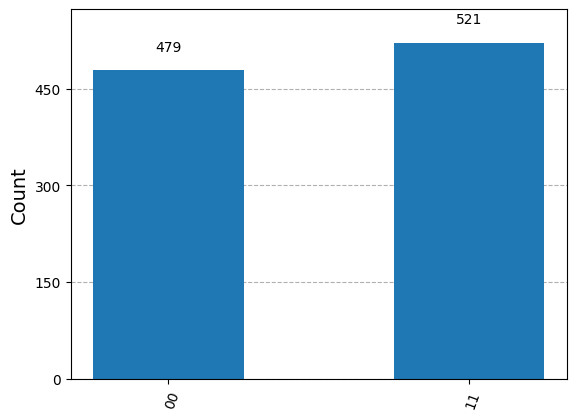

In [47]:
plot_histogram(B00counts)

Nous voyons qu'environ $50\%$ de l'époque, la chaîne de bits de sortie est $00$.

Qiskit Aer est un cadre de simulation haute performance pour les circuits quantiques. Il fournit plusieurs _backends_ pour atteindre différents objectifs de simulation.

Nous reprenons la même expérience avec `AerSimulator`.

In [48]:
try: 
    from qiskit_aer import AerSimulator
except:
    !pip install qiskit-aer
    from qiskit_aer import AerSimulator
from qiskit import transpile

# Select the AerSimulator from the qiskit_aer
q_sim2 = AerSimulator()

#Compile the circuit (by adding the transpiler) to reduce the circuit to QASM instructions
# supported by the backend
compiled_circuit2 = transpile(circuit, q_sim2)

# Run the simulator on 1000 shots
job2 = q_sim2.run(compiled_circuit2, shots=1000)

# Collect results and count
result2 = job2.result()
B00counts2 = result2.get_counts(compiled_circuit2)

# Print 
print("\nTotal count for 00 and 11 are:",B00counts2)


Total count for 00 and 11 are: {'00': 443, '11': 557}


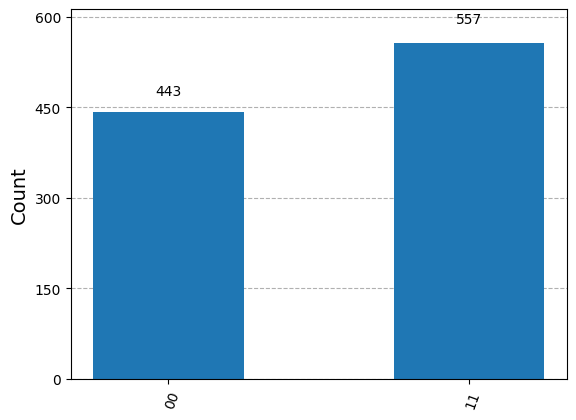

In [49]:
plot_histogram(B00counts2)

# Autres exemples

## Exemple 1

Considérons un état de produit de 2 qubits $|\psi\rangle=|+\rangle\otimes|0\rangle$.

In [50]:
psi = Statevector.from_label('+0')

1. Probabilités de mesurer les deux qubits

In [51]:
psi.probabilities()

array([0.5, 0. , 0.5, 0. ])

2. Probabilités de mesurer uniquement le qubit-0

In [52]:
psi.probabilities([0])

array([1., 0.])

3. Probabilités de mesurer uniquement le qubit-1

In [53]:
psi.probabilities([1])

array([0.5, 0.5])

## Exemple 2

Nous pouvons utiliser la propriété `statevector.todic ()` pour convertir un statevector en dictionnaire. Pour $|\psi\rangle=|-\rangle\otimes|0\rangle$,

In [54]:
psi = Statevector.from_label('-0')
psi.to_dict()

{'00': (0.7071067811865475+0j), '10': (-0.7071067811865475+0j)}

# Exercices

## État GHZ

Créer l'état $\mathtt{GHZ}$
\begin{equation}
|\rm{GHZ}\rangle=\mathtt{CX}_{20}\mathtt{CX}_{10}(\mathbb{I}\otimes\mathbb{I}\otimes\mathtt{H})|000\rangle 
=\frac{1}{\sqrt{2}}\left(|000\rangle + |111\rangle\right),
\end{equation}
et évaluer la probabilité de trouver la chaîne de bits $111$.

## Portes Multi Hadamard

Utilisez les portes Hadamard pour construire un circuit qui produit en sortie (cf. vos notes de cours), avec l'état initial $\ket{000}$,
\begin{equation}
\frac{1}{\sqrt{8}}(|000\rangle + |001\rangle + \cdots + |111\rangle).
\end{equation}

## Retropropagation de la phase

1. Créez l'état $|+-\rangle$ avec un `Statevector` et visualisez avec `plot_bloch_multivector ()`.
2. Donnez le résultat de l'action de la porte CX sur celle-ci et visualisez avec `plot_bloch_multivector ()`.
3. Vérifiez que $\mathtt{CX}_{[01]}\equiv\mathtt{(H\otimes H)}\mathtt{CX}_{[10]}\mathtt{(H\otimes H)}$.

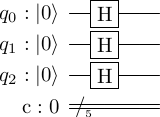

In [3]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3,5)
qc.h(0)
qc.h(1)
qc.h(2)
qc.draw('latex', initial_state=True)

In [6]:
qc.draw??

Signature:
qc.draw(
    output: 'str | None' = None,
    scale: 'float | None' = None,
    filename: 'str | None' = None,
    style: 'dict | str | None' = None,
    interactive: 'bool' = False,
    plot_barriers: 'bool' = True,
    reverse_bits: 'bool | None' = None,
    justify: 'str | None' = None,
    vertical_compression: 'str | None' = 'medium',
    idle_wires: 'bool' = True,
    with_layout: 'bool' = True,
    fold: 'int | None' = None,
    ax: 'Any | None' = None,
    initial_state: 'bool' = False,
    cregbundle: 'bool | None' = None,
    wire_order: 'list[int] | None' = None,
    expr_len: 'int' = 30,
)
Source:   
    def draw(
        self,
        output: str | None = None,
        scale: float | None = None,
        filename: str | None = None,
        style: dict | str | None = None,
        interactive: bool = False,
        plot_barriers: bool = True,
        reverse_bits: bool | None = None,
        justify: str | None = None,
        vertical_compression: str | None = 